In [1]:
# ===============================================
# 1. Importación de librerías
# ===============================================

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# ===============================================
# 2. Montar drive
# ===============================================

from google.colab import drive
drive.mount('/content/drive')

# ===============================================
# 3. Carga del dataset
# ===============================================

# Especifica la ruta completa del archivo en tu Google Drive
#file_path = '/content/drive/MyDrive/Usuarios-Caracteristicas por usuario.xlsx'
#file_path = '/content/drive/MyDrive/Tesis- Borradores/Fase Final ()/Datos de Prueba/Caracteristicas por usuario.xlsx'
#file_path = '/content/drive/MyDrive/Tesis- Borradores/FASE 1/TEST/grouped_data_test.xlsx'
#file_path = '/content/drive/MyDrive/Tesis- Borradores/Fase Final ()/Datos de Prueba/TRAIN - Caracteristicas_usuario.xlsx'
file_path = '/content/drive/MyDrive/Tesis- Borradores/Fase Final ()/Datos de Prueba/Datos/TRAIN Y TRIAL/grouped_trainytrial.xlsx'


# Cargar el archivo Excel en un DataFrame
df = pd.read_excel(file_path)



Mounted at /content/drive


**KNC con definicion de hiperparametros**



Se utilizan los mejores hiperparametros encontrados y un listado variable de caracteristicas

In [41]:
# ===============================================
# 4. Hiperparametros base
# ===============================================


# Los mejores hiperparámetros base
best_params = {
    'n_neighbors': 5,        # Número de vecinos a considerar (k)
    'weights':'distance',     # Peso uniforme para todos los vecinos ('distance' también es común)
    'algorithm':'auto',      # Algoritmo de búsqueda de vecinos: 'auto', 'ball_tree', 'kd_tree', 'brute'
    'leaf_size':30,          # Tamaño de hoja para 'ball_tree' o 'kd_tree'
    'p':2,                   # Parámetro de potencia para la métrica de Minkowski (p=2 equivale a Euclidiana)
    'metric':'manhattan',    # Tipo de métrica ('euclidean', 'manhattan', etc.)
    'n_jobs':None
}

# Crear el pipeline con StandardScaler y KNeighborsClassifier
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(
        n_neighbors=best_params['n_neighbors'],
        weights=best_params['weights'],
        algorithm=best_params['algorithm'],
        leaf_size=best_params['leaf_size'],
        p=best_params['p'],
        metric=best_params['metric'],
        n_jobs=best_params['n_jobs']
    )
)


Definicion de caracteristicas


In [42]:
# ===============================================
# 5. Selección de características
# ===============================================


# Codificar las variables categóricas
label_encoder_sentiment = LabelEncoder()
df['sentiment_numeric'] = label_encoder_sentiment.fit_transform(df['sentiment'])

# Seleccionar las características y la variable objetivo
columnas_seleccionadas = [
   'toxicity',

   'POS','NEU','NEG',

   'alegría','tristeza' ,'miedo', 'disgusto', 'enojo', 'sorpresa',

   'me', 'mi','yo','mí',

   'num_palabras_largas',
   'negaciones',
   #'num_palabras_mayusculas',
   #'num_signos_puntuacion',
   #'num_palabras_mayusculas',

   'falta de motivacion',
   'pensamientos suicidas',
   'aislamiento social',
   #'baja autoestima',

   #'hora',

   #'Medicamento_ansiedad', 'Medicamento_depresion'

   'pensamientos acelerados',
   #'insomnio',
   'ataques de panico'
]

# Normalizar solo las columnas numéricas específicas
scaler = MinMaxScaler()
cols_to_normalize = [
    'num_palabras_largas','num_palabras_mayusculas','negaciones', 'num_signos_puntuacion','num_palabras_primera_mayuscula'

]

#'num_palabras_largas','negaciones','num_palabras_mayusculas',
#'num_palabras_primera_mayuscula', 'num_signos_puntuacion',

# Verificar que las columnas a normalizar existan en el DataFrame antes de normalizar
cols_to_normalize = [col for col in cols_to_normalize if col in df.columns]
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Seleccionar las características
X = df[columnas_seleccionadas].copy()

# Codificar las etiquetas de la columna 'label'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])  # 0, 1 y 2 deben estar en esta columna

# ===============================================
# 6. División del dataset 70% train / 30% test
# ===============================================

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




Entrenamiento del modelo

In [43]:
# ===============================================
# 7. Configuración base del modelo
# ===============================================

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Calcular métricas de evaluación
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar métricas
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy on test set: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# Mostrar predicciones y etiquetas verdaderas
predicciones_df = pd.DataFrame({
    'Etiqueta Verdadera': y_test,
    'Predicción': y_pred
})

print('\nPredicciones y Etiquetas Verdaderas:')
print(predicciones_df)

F1 Score: 0.7328
Accuracy on test set: 0.7397
Precision: 0.7397
Recall: 0.7397
Confusion Matrix:
[[66  7  3]
 [18 28  5]
 [ 2  3 14]]

Predicciones y Etiquetas Verdaderas:
     Etiqueta Verdadera  Predicción
0                     0           0
1                     0           0
2                     1           0
3                     1           1
4                     0           0
..                  ...         ...
141                   0           0
142                   0           0
143                   1           1
144                   0           0
145                   1           1

[146 rows x 2 columns]


**Guarda el modelo**

In [25]:
# ===============================================
# 8. Guardar el modelo
# ===============================================

# 7. Guardar el modelo entrenado
import joblib

# Guardar el pipeline completo (incluye el scaler y el modelo KNC)
joblib.dump(pipeline, 'modelo_knc_entrenado.pkl')  # Cambiado a KNC

# Guardar el label encoder para la columna 'label'
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Modelo KNC entrenado y guardado exitosamente.")

Modelo KNC entrenado y guardado exitosamente.


**Búsqueda de los mejores hiperparametros**

In [26]:
# ===============================================
# 9. Búsqueda de Hiperparámetros
# ===============================================

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Crear el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Definir el espacio de búsqueda
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan'],
    'knn__p': [1, 2]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Ejecutar la búsqueda
grid_search.fit(X, y)

# Resultados
print("Mejores Hiperparámetros:", grid_search.best_params_)
print("Mejor F1 Score ponderado:", grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Mejores Hiperparámetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}
Mejor F1 Score ponderado: 0.6916132002445482



**Utilizando validacion cruzada**

Utilizando cross_validate

In [27]:
# ===============================================
# 10. Validación Cruzada con el mejor modelo KNC
# ===============================================

from sklearn.model_selection import cross_validate

# Validación cruzada directamente con el pipeline optimizado encontrado por GridSearchCV
cv_results = cross_validate(
    grid_search.best_estimator_,  # Usa el mejor pipeline completo (Scaler + KNC)
    X, y, cv=5,
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
    n_jobs=-1
)

# Mostrar métricas promedio
print("Resultados de Validación Cruzada (Promedios):")
for metric in ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']:
    print(f"{metric.capitalize()}: {cv_results['test_' + metric].mean():.4f}")


Resultados de Validación Cruzada (Promedios):
Accuracy: 0.7031
Precision_weighted: 0.7129
Recall_weighted: 0.7031
F1_weighted: 0.6916


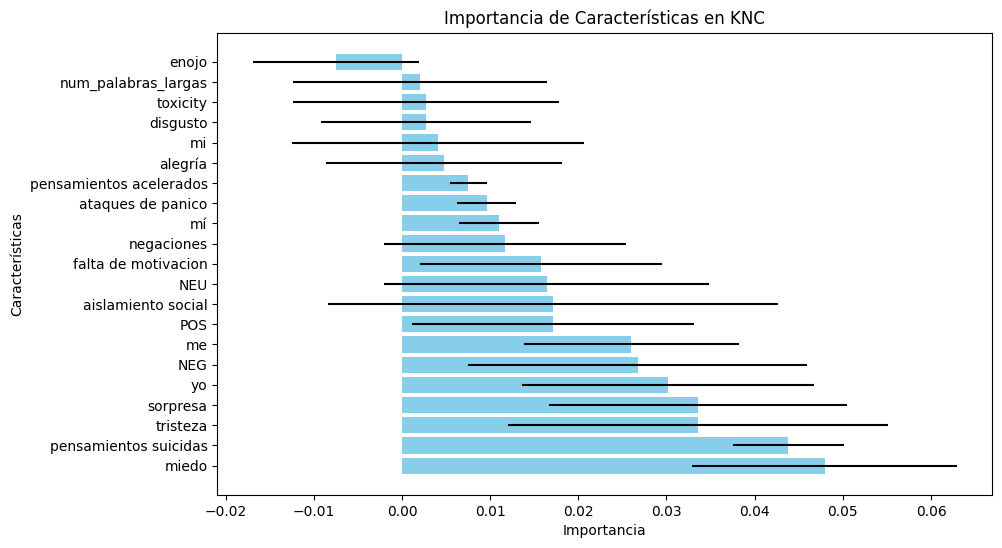

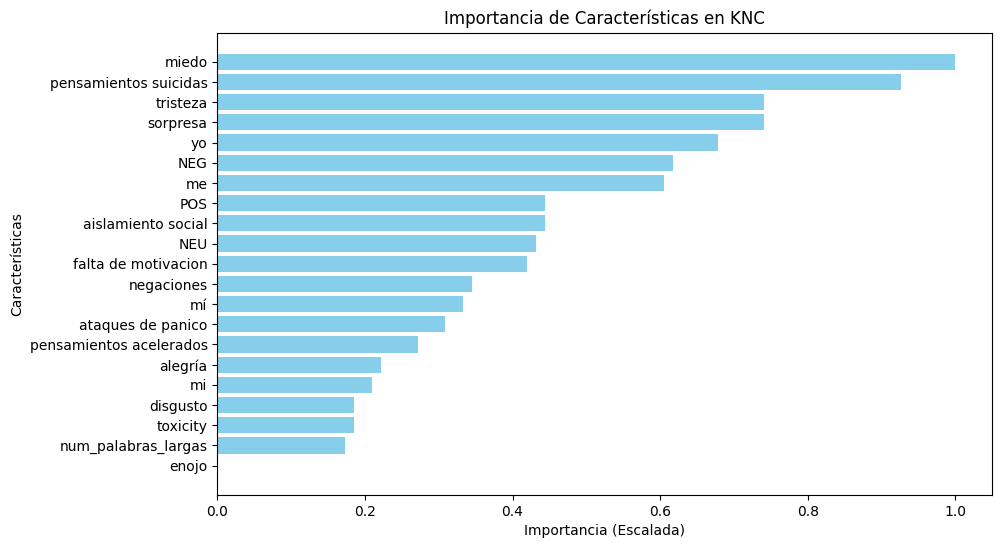

In [28]:
# ===============================================
# 11. Importancia de características
# ===============================================

import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Asumiendo que 'pipeline' es tu pipeline de KNC entrenado
# y 'X_test', 'y_test' son tus datos de prueba

# Use the best estimator from the grid search
best_pipeline = grid_search.best_estimator_

# Calcular la importancia de las características con permutation_importance
result = permutation_importance(best_pipeline, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')

# Obtener la importancia promedio y la desviación estándar
importances = result.importances_mean
std = result.importances_std

# Ordenar las características por importancia (de mayor a menor)
indices_ordenados = np.argsort(importances)[::-1]
nombres_caracteristicas_ordenadas = [X_test.columns[i] for i in indices_ordenados]

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(nombres_caracteristicas_ordenadas, importances[indices_ordenados], xerr=std[indices_ordenados], color='skyblue')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características en KNC")
plt.show()


# Normalizar la importancia a un rango de 0 a 1
scaler = MinMaxScaler()
importances_scaled = scaler.fit_transform(importances.reshape(-1, 1)).flatten()

# Ordenar las características por importancia (de mayor a menor)
indices_ordenados = np.argsort(importances_scaled)[::1]  # Ordenar por la importancia escalada
nombres_caracteristicas_ordenadas = [X_test.columns[i] for i in indices_ordenados]

# Visualizar la importancia de las características (con barras horizontales)
plt.figure(figsize=(10, 6))
plt.barh(nombres_caracteristicas_ordenadas, importances_scaled[indices_ordenados], color='skyblue')
plt.xlabel("Importancia (Escalada)")
plt.ylabel("Características")
plt.title("Importancia de Características en KNC")
plt.show()